In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Base.classes.measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1213fed10>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1214070b0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121407170>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121407230>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1214072f0>,
              'tobs': <sqlalchemy.orm.a

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
for row in session.query(Measurement).order_by(Measurement.date.desc()).limit(1).all():
    last_date = dt.datetime.strptime(row.date , '%Y-%m-%d')
    year_before_last_date = last_date - dt.timedelta(days=365)
    
# Perform a query to retrieve the data and precipitation scores
data_list = []
for row in session.query(Measurement.date, Measurement.prcp).all():
    date = dt.datetime.strptime(row.date, '%Y-%m-%d')
    if date >= year_before_last_date:
        data_list.append(row)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_list, columns =['date', 'prcp'])
df = df.set_index('date')

# Sort the dataframe by date
df = df.sort_values(by=['date'])
df = df.dropna()
#df.shape
df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


<function matplotlib.pyplot.show(*args, **kw)>

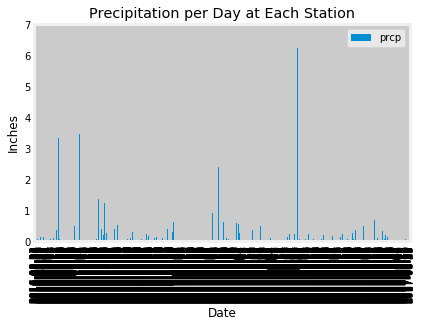

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar')
plt.title("Precipitation per Day at Each Station")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

max_prcp = df['prcp'].max()
min_prcp = df['prcp'].min()
avg_prcp = df['prcp'].mean()
med_prcp = df['prcp'].median()
var_prcp = df['prcp'].var()
std_prcp = df['prcp'].std()
sem_prcp = df['prcp'].sem()

summ_df = pd.DataFrame({
    "Max Precipitation (in)": max_prcp,
    "Min Precipitation (in)": min_prcp,
    "Average Precipitation (in)": avg_prcp,
    "Median Precipitation (in)": med_prcp,
    "Variance of Precipitation (in)": var_prcp,
    "Standard Deviation Precipitation (in)": std_prcp,
    "SEM Precipitation (in)": sem_prcp
}, index=[0])

summ_df

,Max Precipitation (in),Min Precipitation (in),Average Precipitation (in),Median Precipitation (in),Variance of Precipitation (in),Standard Deviation Precipitation (in),SEM Precipitation (in)
0,6.7,0.0,0.177279,0.02,0.212696,0.46119,0.010259


In [39]:
Base.classes.station.__dict__

mappingproxy({'__table__': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 121afd770>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121b3e890>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121b3e950>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121b3ea10>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x121b3ead0>,
       

In [42]:
for row in session.query(Station.id, Station.name, Station.station).order_by(Station.id.desc()).limit(1).all():
    print(row)

(9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [43]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Text(0, 0.5, 'Frequency')

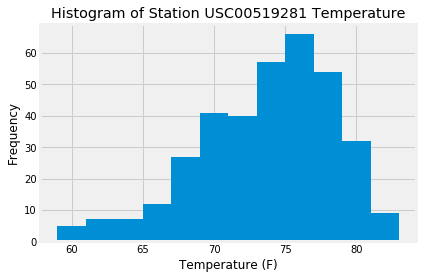

In [56]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS) for the station with the highest number of observations.
for row in session.query(Measurement).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).limit(1).all():
    last_date = dt.datetime.strptime(row.date , '%Y-%m-%d')
    year_before_last_date = last_date - dt.timedelta(days=365)
    
# Perform a query to retrieve the data and precipitation scores
data_list = []
for row in session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').all():
    date = dt.datetime.strptime(row.date, '%Y-%m-%d')
    if date >= year_before_last_date:
        data_list.append(row)
        
df = pd.DataFrame(data_list, columns =['date', 'tobs'])
df = df.set_index('date')

# Sort the dataframe by date
df = df.sort_values(by=['date'])
df = df.dropna()
hist = df.hist(bins=12)
plt.title("Histogram of Station USC00519281 Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")


In [17]:
for date, max_tobs, min_tobs, avg_tobs in session.query(Measurement.date, func.max(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= '2017-07-13').group_by(Measurement.date).all():
    date_f = dt.datetime.strptime(date, '%Y-%m-%d')
    print(date_f)
    

2017-07-13 00:00:00
2017-07-14 00:00:00
2017-07-15 00:00:00
2017-07-16 00:00:00
2017-07-17 00:00:00
2017-07-18 00:00:00
2017-07-19 00:00:00
2017-07-20 00:00:00
2017-07-21 00:00:00
2017-07-22 00:00:00
2017-07-23 00:00:00
2017-07-24 00:00:00
2017-07-25 00:00:00
2017-07-26 00:00:00
2017-07-27 00:00:00
2017-07-28 00:00:00
2017-07-29 00:00:00
2017-07-30 00:00:00
2017-07-31 00:00:00
2017-08-01 00:00:00
2017-08-02 00:00:00
2017-08-03 00:00:00
2017-08-04 00:00:00
2017-08-05 00:00:00
2017-08-06 00:00:00
2017-08-07 00:00:00
2017-08-08 00:00:00
2017-08-09 00:00:00
2017-08-10 00:00:00
2017-08-11 00:00:00
2017-08-12 00:00:00
2017-08-13 00:00:00
2017-08-14 00:00:00
2017-08-15 00:00:00
2017-08-16 00:00:00
2017-08-17 00:00:00
2017-08-18 00:00:00
2017-08-19 00:00:00
2017-08-20 00:00:00
2017-08-21 00:00:00
2017-08-22 00:00:00
2017-08-23 00:00:00


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
